In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
import statistics
from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-04-25 13:26:55.501009: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-25 13:26:55.547623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 13:26:56.774229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
shower_dp = 'data/Showerthoughts.csv'
shower_data = pd.read_csv(shower_dp,header=0)
shower_data.head()

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.372964e+09,2785,self.Showerthoughts,1hncvt,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hncvt,http://www.reddit.com/r/Showerthoughts/comment...,NaN
1,1.372606e+09,2488,self.Showerthoughts,1hd8in,I am just a penis. The rest of me is just ther...,4011,1523,162,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hd8in,http://www.reddit.com/r/Showerthoughts/comment...,NaN
2,1.361920e+09,2387,self.Showerthoughts,19aft0,A TV channel where all the shows are set in th...,2558,171,77,http://www.reddit.com/r/Showerthoughts/comment...,"You could have crime drama's, sitcoms, science...",...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_19aft0,http://www.reddit.com/r/Showerthoughts/comment...,NaN
3,1.370793e+09,2038,self.Showerthoughts,1fzgzv,If the oldest person on earth is 116 years old...,2559,521,71,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1fzgzv,http://www.reddit.com/r/Showerthoughts/comment...,NaN
4,1.371846e+09,2007,self.Showerthoughts,1gte67,"If Kanye and Kim's child's name is North West,...",2687,680,76,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1gte67,http://www.reddit.com/r/Showerthoughts/comment...,NaN


In [3]:
shower_data = shower_data.drop(['domain','permalink', 'over_18','link_flair_css_class',
       'author_flair_css_class', 'selftext','thumbnail', 'name', 'url', 'link_flair_text','distinguished'], axis='columns')

shower_data["engagement"] = shower_data["ups"] + shower_data["downs"] + shower_data["num_comments"]

In [4]:
tweets = shower_data['title']

targets = np.array(shower_data['ups'])
eng_targets = np.array(shower_data["engagement"])

In [5]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

 # config values// Beginning of word embeddings
embed_size = 300 # how big is each word vector
max_features = 50000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 25 # max number of words in a question to use


tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(tweets)
tweets = tokenizer.texts_to_sequences(tweets)


tweets = pad_sequences(tweets, maxlen=maxlen)
print(len(tweets))
text_df = pd.DataFrame(tweets, shower_data["id"] )
text_df=text_df.rename(columns={1:'1',              2:"2",              3:"3",              4:"4",
                    5:"5",              6:"6",              7:"7",              8:"8",
                    9:"9",             10:"10",             11:"11",             12:"12",
                   13:"13",             14:"14",             15:"15",             16:"16",
                   17:"17",             18:"18",             19:"19",             20:"20",
                   21:"21",             22:"22",             23:"23",             24:"24"})
shower_data = shower_data.merge(text_df, how='left', on='id')


1000


In [35]:
shower_data.columns


Index([    'created_utc',           'score',              'id',
                 'title',             'ups',           'downs',
          'num_comments',    'subreddit_id',          'edited',
               'is_self',      'engagement',                 0,
                     '1',               '2',               '3',
                     '4',               '5',               '6',
                     '7',               '8',               '9',
                    '10',              '11',              '12',
                    '13',              '14',              '15',
                    '16',              '17',              '18',
                    '19',              '20',              '21',
                    '22',              '23',              '24',
       'embedded_titles'],
      dtype='object')

In [36]:

shower_data['embedded_titles'] = pd.Series(tweets.tolist())

features = shower_data.drop(['score', 'id', 'title', 'ups', 'downs', 'num_comments', 'subreddit_id', 'edited','engagement', 'is_self', 'embedded_titles'], axis='columns')
shower_data['embedded_titles'].iloc[25]
# features_notTitle = shower_data[['downs', 'created_utc']]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 10,
 184,
 7,
 336,
 1411,
 16,
 1412,
 6,
 838,
 4,
 599]

0.25    139.00
0.50    220.00
0.75    479.25
Name: engagement, dtype: float64


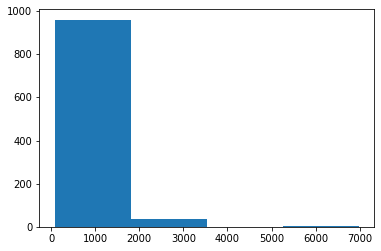

In [37]:
import matplotlib.pyplot as plt
print(shower_data['engagement'].quantile([0.25,0.5,0.75]))

plt.hist(eng_targets, bins = 4)
plt.show()

In [38]:
targets
def make_target_buckets(targets):
    new_targets = []
    for t in targets:
        if t > 479:
            new_targets.append(4)
        elif t > 220:
            new_targets.append(3)
        elif t > 139:
            new_targets.append(2) 
        else:
            new_targets.append(1)
    return new_targets
stat_targ_buckets = make_target_buckets(eng_targets)

   

In [39]:
r = [1,2,3,4, 5]
np.histogram(stat_targ_buckets, bins=r)
# 25% dummy model accuracy 

(array([251, 250, 249, 250]), array([1, 2, 3, 4, 5]))

In [40]:
targets
def make_target_buckets(targets):
    new_targets = []
    for t in targets:
        if t > 400:
            new_targets.append(4)
        elif t > 150:
            new_targets.append(3)
        elif t > 100:
            new_targets.append(2) 
        else:
            new_targets.append(1)
    return new_targets
    
targ_buckets = make_target_buckets(targets)


In [41]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(features)
# features = scaler.transform(features)
# plt.hist(targ_buckets, bins = 4)
r = [1,2,3,4, 5]
np.histogram(targ_buckets, bins=r)
# 32.7% dummy model accuracy 

(array([198, 227, 327, 248]), array([1, 2, 3, 4, 5]))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, targ_buckets, test_size=.2, train_size=.8, random_state=None, shuffle=True, stratify=None)
statX_train, statX_test, staty_train, staty_test = train_test_split(features, stat_targ_buckets, test_size=.2, train_size=.8, random_state=None, shuffle=True, stratify=None)

0.325


/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858

<AxesSubplot:>

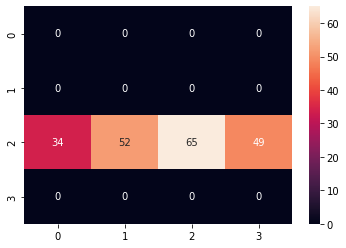

In [14]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(X_train, y_train)
preds = logReg.predict(X_test)
logReg.score(X_test, y_test)

print(logReg.score(X_test, y_test))
rfcCM = confusion_matrix(preds, y_test)
sns.heatmap(rfcCM, annot=True)

0.22


/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:>

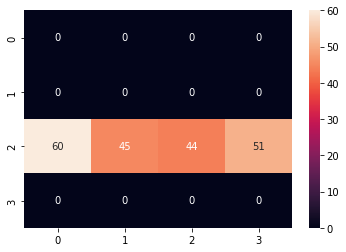

In [43]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(statX_train, staty_train)
preds = logReg.predict(statX_test)

print(logReg.score(statX_test, staty_test))
rfcCM = confusion_matrix(preds, staty_test)
sns.heatmap(rfcCM, annot=True)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
features_poly = poly.fit_transform(features)

/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.93


/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:>

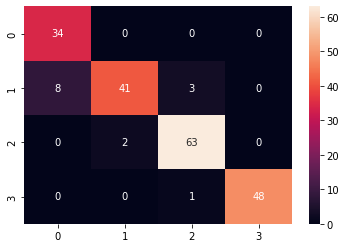

In [17]:
#RFC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns
ax= plt.subplot()

clf = RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(X_train, y_train)
preds2 = clf.predict(X_test)
print(accuracy_score(y_test, preds2))

rfcCM = confusion_matrix(y_test, preds2)
sns.heatmap(rfcCM, annot=True)

/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.685


/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:>

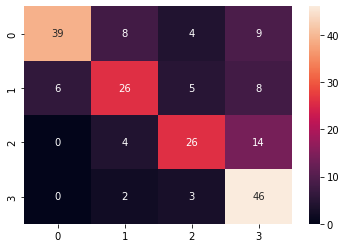

In [44]:
clf = RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(statX_train, staty_train)
preds2 = clf.predict(statX_test)
print(accuracy_score(staty_test, preds2))

rfcCM = confusion_matrix(staty_test, preds2)
sns.heatmap(rfcCM, annot=True)

0.325


/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:>

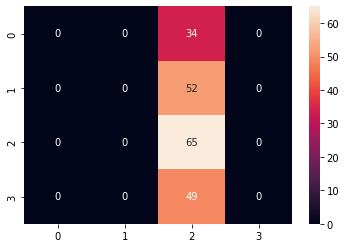

In [19]:
from sklearn.svm import SVC
clf= SVC(gamma='auto', C= 1, degree = 3, kernel = "rbf")
clf.fit(X_train, y_train)
preds2 = clf.predict(X_test)
print(accuracy_score(y_test, preds2))
rfcCM = confusion_matrix(y_test, preds2)
sns.heatmap(rfcCM, annot=True)

0.22


/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:>

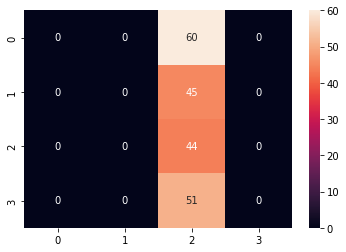

In [45]:
from sklearn.svm import SVC
clf= SVC(gamma='auto', C= 1, degree = 3, kernel = "rbf")
clf.fit(statX_train, staty_train)

preds2 = clf.predict(statX_test)
print(accuracy_score(staty_test, preds2))
rfcCM = confusion_matrix(staty_test, preds2)
sns.heatmap(rfcCM, annot=True)